# <font color='#FFE15D'>**Baby Food Spoon Counting**</font> ✊ ☝️ ✌️
### **How many spoons are in cans of baby food?**

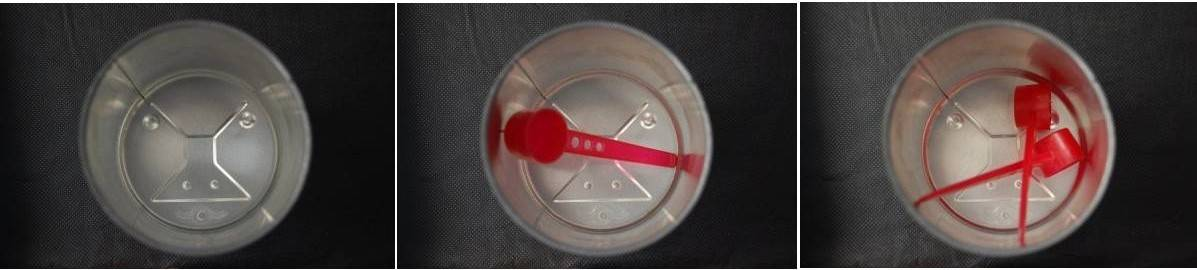

## <span style="font-size: 0.9em;">🔴</span> **Import**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import math
import os
from glob import glob

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## <span style="font-size: 0.9em;">🟣</span> **Dataset**

In [2]:
root_dir = 'data/BabyFood'
image_paths = glob(os.path.join(root_dir, "*.JPG"))

# Function to extract prefix and numbers for sorting
def extract_prefix_and_number(file_name):
    parts = file_name.split('-')
    prefix = parts[-1].split('.')[0].rstrip('0123456789') 
    number_part = ''.join(filter(str.isdigit, parts[-1]))  
    return (prefix, int(number_part))

sorted_image_paths = sorted(image_paths, key=extract_prefix_and_number)
print(f'Total number of images: {len(sorted_image_paths)}\n')
print("Image Paths:")
print("\n".join(sorted_image_paths))

Total number of images: 21

Image Paths:
data/BabyFood/BabyFood-Sample0.JPG
data/BabyFood/BabyFood-Sample1.JPG
data/BabyFood/BabyFood-Sample2.JPG
data/BabyFood/BabyFood-Test1.JPG
data/BabyFood/BabyFood-Test2.JPG
data/BabyFood/BabyFood-Test3.JPG
data/BabyFood/BabyFood-Test4.JPG
data/BabyFood/BabyFood-Test5.JPG
data/BabyFood/BabyFood-Test6.JPG
data/BabyFood/BabyFood-Test7.JPG
data/BabyFood/BabyFood-Test8.JPG
data/BabyFood/BabyFood-Test9.JPG
data/BabyFood/BabyFood-Test10.JPG
data/BabyFood/BabyFood-Test11.JPG
data/BabyFood/BabyFood-Test12.JPG
data/BabyFood/BabyFood-Test13.JPG
data/BabyFood/BabyFood-Test14.JPG
data/BabyFood/BabyFood-Test15.JPG
data/BabyFood/BabyFood-Test16.JPG
data/BabyFood/BabyFood-Test17.JPG
data/BabyFood/BabyFood-Test18.JPG


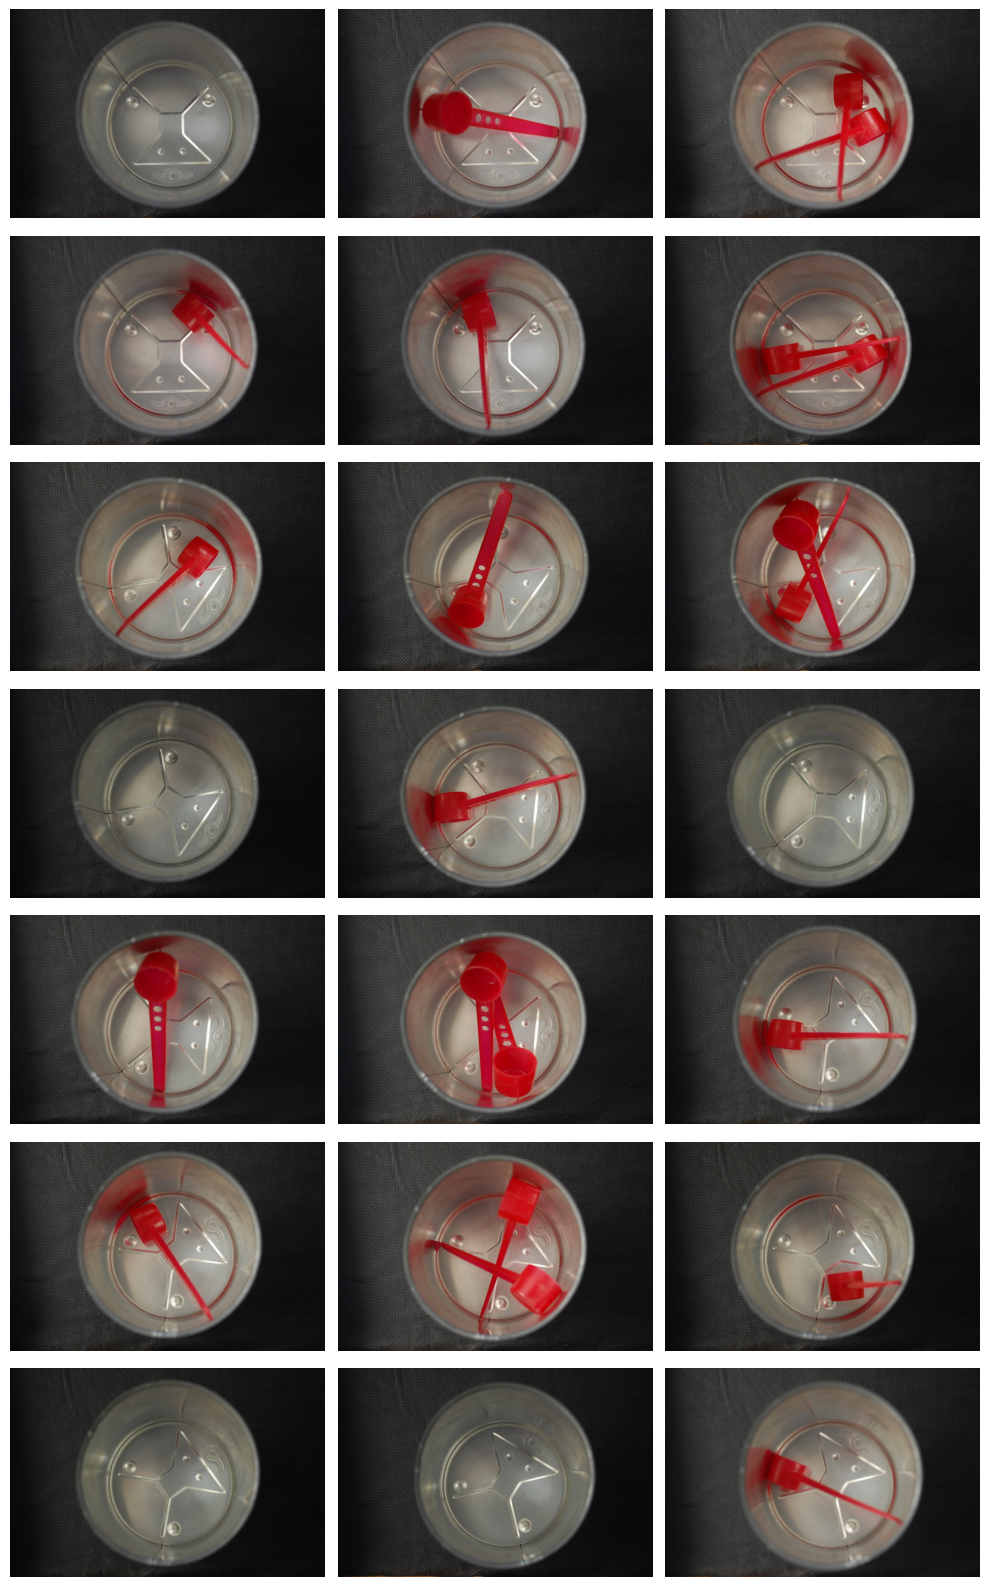

In [3]:
# Visualize data
rows, cols = 7, 3
fig, axes = plt.subplots(rows, cols, figsize=(10, 16))

for i, ax in enumerate(axes.flatten()):
    img = plt.imread(sorted_image_paths[i])  
    ax.imshow(img)  
    ax.axis('off') 

plt.tight_layout()
plt.show()

In [4]:
# Training images
train_images = {
    0: "data/BabyFood/BabyFood-Sample0.JPG", 
    1: "data/BabyFood/BabyFood-Sample1.JPG",  
    2: "data/BabyFood/BabyFood-Sample2.JPG"   
}

## <span style="font-size: 0.9em;">🔵</span> **Feature extraction**

Extract features:
- Number of red regions
- Total red area

In [5]:
def extract_features(image_path):
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_red1 = np.array([0, 140, 130])     
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 140, 130])   
    upper_red2 = np.array([180, 255, 255])

    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    red_mask = cv2.bitwise_or(mask1, mask2)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    red_mask = cv2.morphologyEx(red_mask, cv2.MORPH_CLOSE, kernel)
    red_mask = cv2.morphologyEx(red_mask, cv2.MORPH_OPEN, kernel)

    contours, hierarchy = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    filtered_contours = filter_contours(contours, area_threshold=500)

    num_blobs = len(filtered_contours)
    total_area = sum(cv2.contourArea(c) for c in filtered_contours)

    return [num_blobs, total_area]

def filter_contours(contours, area_threshold):
    filtered_contours = []
    for contour in contours:
        if cv2.contourArea(contour) > area_threshold:
            filtered_contours.append(contour)
    return filtered_contours

#### 🟤 **Training data and labels**

In [6]:
def load_training_data(train_images):
    X = [] 
    y = []  

    for label, image_path in train_images.items():
        features = extract_features(image_path)
        X.append(features)
        y.append(label)

    return np.array(X), np.array(y)

X_train, y_train = load_training_data(train_images)

## <span style="font-size: 0.9em;">🟠</span> **Classification**

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

clf = SVC(kernel="linear", C=1.0)
clf.fit(X_train, y_train)

SVC(kernel='linear')

#### 🟡 **Test the model on test images**

In [8]:
label_map = {0: "No Spoon", 1: "One Spoon", 2: "Two Spoons"}
test_results = []

for image_path in sorted_image_paths[3:]:
    features = extract_features(image_path)
    features = scaler.transform([features])  
    prediction = clf.predict(features)[0]

    result = label_map[prediction]
    test_results.append((image_path, result))

## <span style="font-size: 0.9em;">⚪</span> **Visualization of Results**

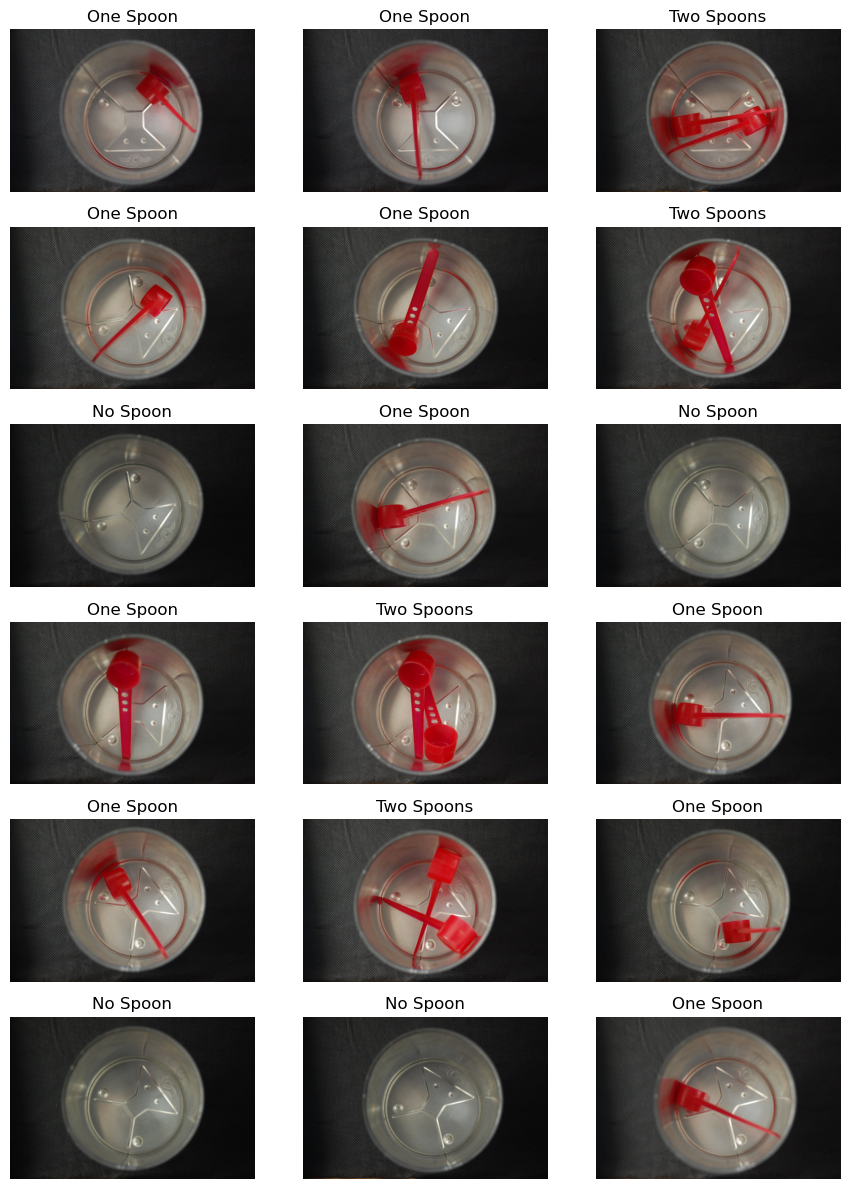

In [9]:
def display_results(results, columns=3):
    rows = math.ceil(len(results) / columns)
    plt.figure(figsize=(columns * 3, rows * 2))  

    for i, (image_path, result) in enumerate(results):
        img = cv2.imread(image_path)
        plt.subplot(rows, columns, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(result)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_results(test_results, columns=3)